In [1]:
import pandas as pd
import numpy as np
import mysql.connector
import seaborn as sns
import matplotlib.pyplot as plt
from googletrans import Translator


In [2]:
def mysql_conn():
    return mysql.connector.connect(host='cpanel.insaid.co',
           user='student',
           password='student',
           database='Capstone1')

In [3]:
conn=mysql_conn()
#a=pd.read_sql_query("SHOW TABLES",con=conn)
#b=pd.read_sql_query("select * from events_data",con=conn)
c=pd.read_sql_query("select * from gender_age_train",con=conn)
d=pd.read_sql_query("select * from phone_brand_device_model",con=conn)
conn.close()

events_data=pd.read_csv('events_data.csv')

In [4]:
print("user_data_missing:",c.device_id.isnull().sum())
print("device_data_missing:",d.device_id.isnull().sum())
print("events_data_missing:",events_data.device_id.isnull().sum())
len(events_data)

user_data_missing: 0
device_data_missing: 0
events_data_missing: 453


3252950

### Observations - USER DATA

No handles with labels found to put in legend.
No handles with labels found to put in legend.


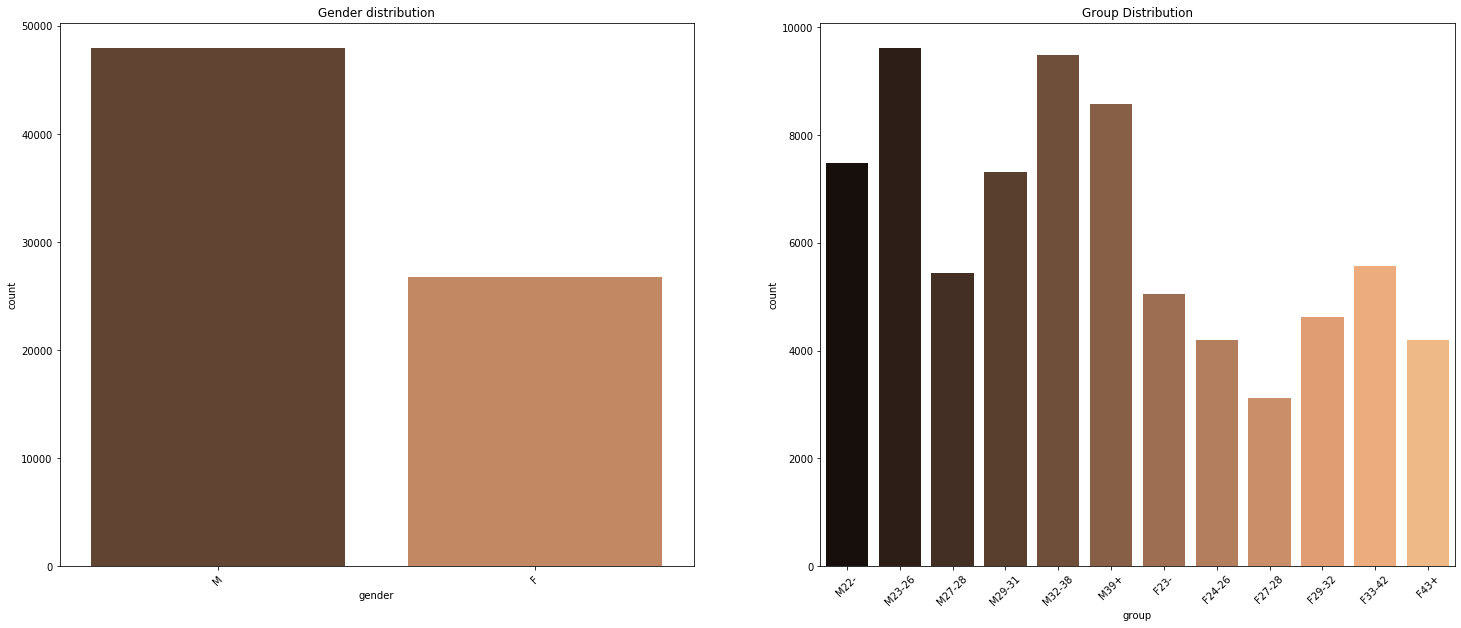

In [5]:
import seaborn as sns
user_Data=c.drop(['device_id'],axis=1)
fig,ax=plt.subplots(1,2,figsize=(25,10))

sns.countplot(x='gender',data=user_Data,palette='copper',ax=ax[0]).set_title('Gender distribution')
#sns.countplot(x='age',data=user_Data,palette='ch:.25',ax=ax[1]).set_title('Age distribution')
sns.countplot(x='group',order=['M22-','M23-26','M27-28','M29-31','M32-38','M39+','F23-','F24-26','F27-28','F29-32','F33-42','F43+'],data=user_Data,palette='copper',ax=ax[1]).set_title('Group Distribution')

for i in range(2):
    ax[i].legend(loc='upper right', frameon=False)
    for tick in ax[i].get_xticklabels():
        tick.set_rotation(45)
        
plt.show()



### DEVICES DATA

In [6]:
d.head(5)

,device_id,phone_brand,device_model
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,小米,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,三星,A368t
4,-2015528097870762664,小米,红米Note2


In [7]:
phn_brnd=pd.DataFrame(d['phone_brand'].drop_duplicates()).reset_index()
phn_model=pd.DataFrame(d['device_model'].drop_duplicates()).reset_index()

In [8]:
phn_brnd.drop(['index'],axis=1,inplace=True)
phn_model.drop(['index'],axis=1,inplace=True)

In [9]:
translator = Translator()
l=[]
for i  in range(len(phn_brnd)):
    translations = translator.translate([phn_brnd['phone_brand'][i]], dest='en')
    for translation in translations:
        l.append(translation.text)
        print(translation.text)

vivo
Xiaomi
OPPO
Samsung
Coolpad
Lenovo
Huawei
Qiku
Meizu
Feixun
China Mobile
HTC
Amagatarai
Extreme treasure
LG
Obersin
Quality rice
YOU
Nubian
HP
Nibiru
Mito
Xiangmi
Motorola
Meng Mi
hammer
InFocus
Letv
Hisense
Bilifeng
One plus
Verbal letter
Haier
Cool
Newman
waveguide
Dove
Listen to rhyme
TCL
Amber
Eppel
LOGO
Shallots
Guomi
ASUS
Onda
Ayuni
Konka
Ugo
Banghua
Cyber ​​Yuhua
black rice
Lovme
pioneer
E Pie
Shenzhou
Nokia
Pnel
Candied
Toru
Ou Xin
Mickey
Cube Rubik's Cube
Blue demon
Little Poplar
Belfont
Glutinous rice
Mige
E people E Ben
Simi
Big Q
Taipower
Philips
Vimi
Daxian
Changhong
Vito
Green orange
Originally
Shrimp
Xia Xin
Curtain
Bacardi
SUGAR
Ouqi
Century Star
Wisdom magnesium
Obi
Kivu
Femtosecond
Desai
Yipai
Google
Venus Digital
Widely believed
Noah
THOUSAND
White rice
Big Coke
Projet
Youyu
Shouyun
Remi
Rego
Wopfung
Morale
Fresh rice
Kelly
Vibe
Ovo
Fengmi
Heng Yufeng
Oaks
Siemens
Oledi
PPTV


In [10]:
translator = Translator()
m=[]
for i  in range(len(phn_model)):    
    translations = translator.translate([phn_model['device_model'][i]], dest='en')
    for translation in translations:
        m.append(translation.text)
        print(translation.text)

J13
F 183
R7s
Bite
Redmi Note2
Redmi Note3
S5.1
Galaxy Grand Prime
MI 2S
Galaxy Note 2
R1C
Okami F1 Plus
note top version
Galaxy Mega 2
Star 1
Galaxy S4
MI 3
Find 7
C 8816
Red rice note
X6 L
Galaxy Win
Youth Edition
Indented
Hey
G520-5000
Honor 4A
Charm Blue Note 2
Y560-CL00
Honor 7i
3000
Honor Play 4C
C730Lw
Redmi 2A
A1
One
Galaxy J7
R3
MX2
Glory Play 5
Glory 7
MI 4
One M8
Redmi 1S
Maimang 4
Galaxy S6 Edge
Bite 00 d
P780
Ascend G7
Glory 6
Xperia SL
E17 T.
Honor Play 4X
Ascend P7
Galaxy Grand 2
Honor 3X play version
Honor X2
Ascend P8
See 077
Charm Blue NOTE
Mate 2
M8
Sacrifice +
X710L
A890e
Will
X5M
MX5
Galaxy Mega 5.8
Please 1
Xperia Z1
Honor 6 Plus
X5Max+
Galaxy J5
Galaxy Note 4
Act 1
GN706L
Gz
P8 Lite
Sensation XE with Beats Audio Z715e
A880
Glory+
X5L
8720L
IVO 6655
R7 Plus
Glory Play 4
MX4
Y635-TL00
Galaxy S3
As a cough
3
Please 07
Golden Fighter A8
One X
Xiaomi note
200 pounds
Galaxy S2 Plus
R1
Glory 3C
Xiaomi 4C
Breastfeeding
Mate 7
MY 2
F2
Galaxy S5
Xperia TX
Galaxy Trend DUOS

7251
M601
U5482
S90-u
Xperia U
U880
D330
C986t
EV5
T528d
G630
A656
S660
T60
Y325
Insolent
Shriek
8089
Galaxy S
5832
Snooze
Desire 310
EG966
V10
大神1s
GN135
S3
M10-M
A378t
I cut
s820e
5860S
8076D
8017
Butterfly s
M6
Xperia ZR 
608t
GN810
N986
Blade C
7019
N828
S880i
M030
G616-L076
A208t
GN139
VT898S
U939
Fall 01 S.
Galaxy Ace DUOS
A269i
GN878
One M8 Eye
Bite
VT868
A398t+
Q701C
TS1018
N818
T20
8707
S8-701u
Desire 5088
8017-T00
M8x
T327w
GN105
E600M
Xperia ZL
606w
MK260
memo 5S
Desire 609d
A3
Desire D516d
T8830Pro
HT-I717
A6800
I630T
T35
8713
Galaxy Tab S T800
E621T
Galaxy Grand Max
倾城L3C
t789
U701T
Nexus 7
5218S
0
With
Q302C
U8825D
V919
One ME
Galaxy Infinite
Y220T
IVO 6688
Y610-U00
5216D
小辣椒 4
T820
X920e
L820
S939
Xperia Z1 炫彩版
T9003
微客
T21
V95
Αθ60e
V188
S8-701w
Stutter
One M9
vogue v1
MM1103
M535
5261
i1
idol3
G5
S5
T12
A2860
黄金斗士青春版
P8
802d
Red Pepper NX Plus
A51kc
T004
BF A500
T1-821w
Sensation Z710E
Small fresh 3
little stars
M5 Plus
Galaxy Note 10.1 2014 Edition P601
Galaxy S DUOS


In [11]:
phn_brnd['eng_brand']=l
phn_model['eng_model']=m

In [12]:
mob_devices1=pd.merge(d,phn_brnd,how='left',left_on='phone_brand',right_on='phone_brand')
mob_devices=pd.merge(mob_devices1,phn_model,how='left',left_on='device_model',right_on='device_model')

In [13]:
mob_devices['eng_brand'].drop_duplicates()

0               vivo
1             Xiaomi
2               OPPO
3            Samsung
11           Coolpad
            ...     
64701    Heng Yufeng
66501           Oaks
71650        Siemens
79470          Oledi
79851           PPTV
Name: eng_brand, Length: 116, dtype: object

In [14]:
print(mob_devices[mob_devices['eng_brand']=='Quality rice'].head(2),"\n",len(mob_devices[mob_devices['eng_brand']=='Quality rice']))
print(mob_devices[mob_devices['eng_brand']=='Big Coke'].head(2),"\n",len(mob_devices[mob_devices['eng_brand']=='Big Coke']))
print(mob_devices[mob_devices['eng_brand']=='black rice'].head(2),"\n",len(mob_devices[mob_devices['eng_brand']=='black rice']))
print(mob_devices[mob_devices['eng_brand']=='Fresh rice'].head(2),"\n",len(mob_devices[mob_devices['eng_brand']=='Fresh rice']))
print(mob_devices[mob_devices['eng_brand']=='Bacardi'].head(2),"\n",len(mob_devices[mob_devices['eng_brand']=='Bacardi']))
print(mob_devices[mob_devices['eng_brand']=="Cube Rubik's Cube"].head(2),"\n",len(mob_devices[mob_devices['eng_brand']=="Cube Rubik's Cube"]))

               device_id phone_brand device_model     eng_brand eng_model
123  -942277992798295690          优米            3  Quality rice         3
132  1251552303715560512          优米           R1  Quality rice        R1 
 243
                 device_id phone_brand device_model eng_brand eng_model
22242   873525094626927649         大可乐        MC002  Big Coke     MC002
26167 -4101523564414148692         大可乐        MC002  Big Coke     MC002 
 10
                device_id phone_brand device_model   eng_brand eng_model
2861 -1145583104199299037          黑米           A1  black rice        A1
4213 -1576379705054644712          黑米           A1  black rice        A1 
 47
                 device_id phone_brand device_model   eng_brand eng_model
28927 -4478793803614584475          鲜米         s800  Fresh rice      σθ00
77154  1751236410718403505          鲜米         s800  Fresh rice      σθ00 
 2
                 device_id phone_brand device_model eng_brand eng_model
10992  1298614415133285105   

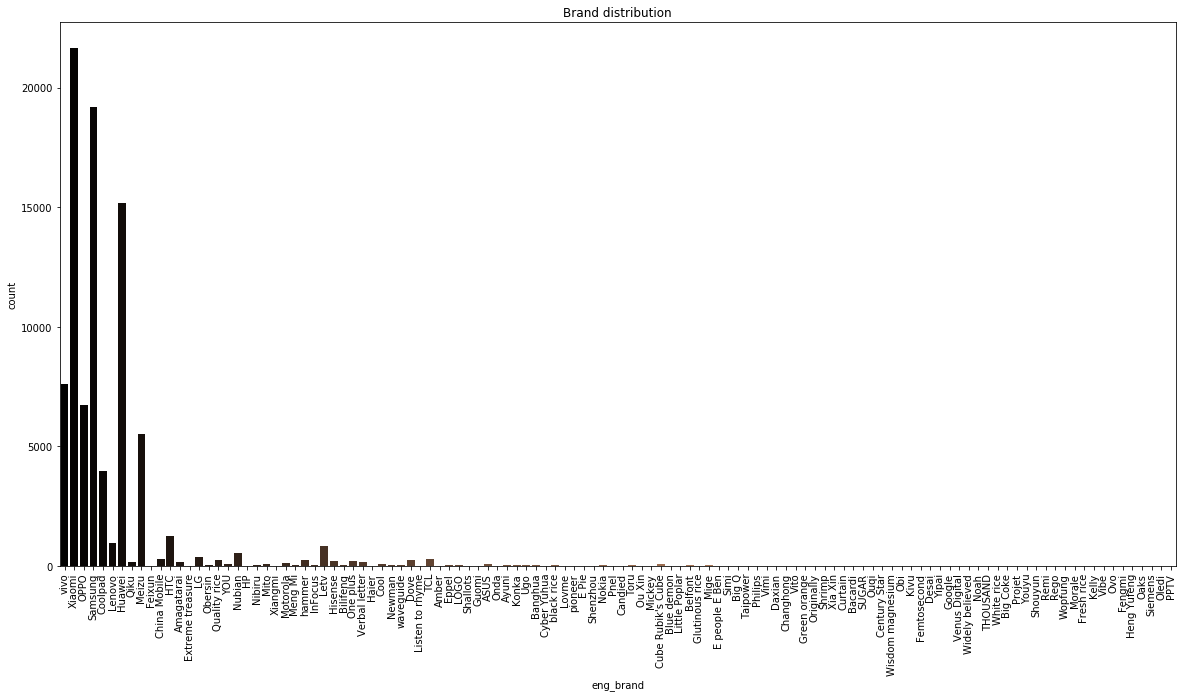

In [15]:
plt.figure(figsize=(20,10))

sns.countplot(x='eng_brand',data=mob_devices,palette='copper').set_title('Brand distribution')
plt.xticks(rotation=90)
plt.show()

In [16]:
pd.set_option('display.max_rows',10000)
data1=pd.DataFrame(mob_devices.groupby(['eng_brand'])['device_id'].count().sort_values(ascending=False)).reset_index()
data1['perc_dist']=(data1['device_id']/len(mob_devices)*100)
print(data1)

             eng_brand  device_id  perc_dist
0               Xiaomi      21645  24.673415
1              Samsung      19211  21.898867
2               Huawei      15181  17.305018
3                 vivo       7596   8.658778
4                 OPPO       6717   7.656795
5                Meizu       5531   6.304858
6              Coolpad       3979   4.535713
7                  HTC       1272   1.449969
8               Lenovo        982   1.119394
9                 Letv        841   0.958667
10              Nubian        540   0.615553
11                  LG        360   0.410369
12        China Mobile        309   0.352233
13                 TCL        280   0.319176
14              hammer        257   0.292958
15                Dove        253   0.288398
16        Quality rice        243   0.276999
17             Hisense        218   0.248501
18            One plus        200   0.227983
19                Qiku        174   0.198345
20       Verbal letter        170   0.193785
21        

#### Observations:
- most share is of Xiomi, Samsung, Huawei
- Some brands that are present are Black rice, Quality rice, White rice, Fresh rice. Are these valid data


### EVENTS DATA

In [17]:
events_data

,event_id,device_id,timestamp,longitude,latitude,city,state
0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi
1,2955066,4.734221e+18,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal
2,605968,-3.264500e+18,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi
3,448114,5.731369e+18,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu
4,665740,3.388880e+17,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand
...,...,...,...,...,...,...,...
3252945,2687452,-1.937028e+18,2016-05-07 23:33:14,73.891597,18.544124,Pune,Maharashtra
3252946,1051580,3.345851e+18,2016-05-03 05:13:30,72.837258,19.018432,Mumbai,Maharashtra
3252947,1316227,-6.406040e+18,2016-05-01 16:03:28,77.235578,28.764065,Delhi,Delhi
3252948,381262,-2.920741e+18,2016-05-05 17:22:36,83.326044,17.765488,Visakhapatnam,AndhraPradesh


In [18]:
events_data.isnull().sum()

event_id       0
device_id    453
timestamp      0
longitude    423
latitude     423
city           0
state        377
dtype: int64

In [19]:
events_data.reset_index(inplace=True)

### Missing value treatment
- Missing device IDs are filled in with device ids from other same lat-longs available
- Missing states are filled in with states from other same cities available.

In [20]:
events1=pd.DataFrame(events_data.groupby(['longitude','latitude'])['device_id'].apply(lambda S: S.mode()[0])).reset_index()

In [21]:
events_data_final=pd.merge(events_data,events1,how='left', on=['longitude','latitude'])

In [22]:
events_data_final['device_id_x']=events_data_final['device_id_x'].astype('str')
events_data_final['device_id_y']=events_data_final['device_id_y'].astype('str')

In [23]:
l=[]
for i in range(len(events_data_final)):
    if events_data_final['device_id_x'][i]=='nan':
        l.append(events_data_final['device_id_y'][i])
    else:
        l.append(events_data_final['device_id_x'][i])

In [24]:
events_data_final['device_id']=l

In [26]:
events_data_final.drop(['index','device_id_x','device_id_y'],axis=1,inplace=True)

In [27]:
print(events_data_final.isnull().sum())
print(events_data_final[events_data_final['device_id']=='nan'])

event_id       0
timestamp      0
longitude    423
latitude     423
city           0
state        377
device_id      0
dtype: int64
Empty DataFrame
Columns: [event_id, timestamp, longitude, latitude, city, state, device_id]
Index: []


In [28]:
events_s=pd.DataFrame(events_data_final.groupby(['city'])['state'].apply(lambda S: S.mode()[0])).reset_index()

In [29]:
events_s2=pd.merge(events_data_final,events_s,how='left',left_on=['city'],right_on=['city'])
#mob_devices=pd.merge(mob_devices1,phn_model,how='left',left_on='device_model',right_on='device_model')

In [30]:
## get the state from city
events_s2.drop(['state_x'],axis=1,inplace=True)

In [31]:
events_s2.isnull().sum()

event_id       0
timestamp      0
longitude    423
latitude     423
city           0
device_id      0
state_y        0
dtype: int64

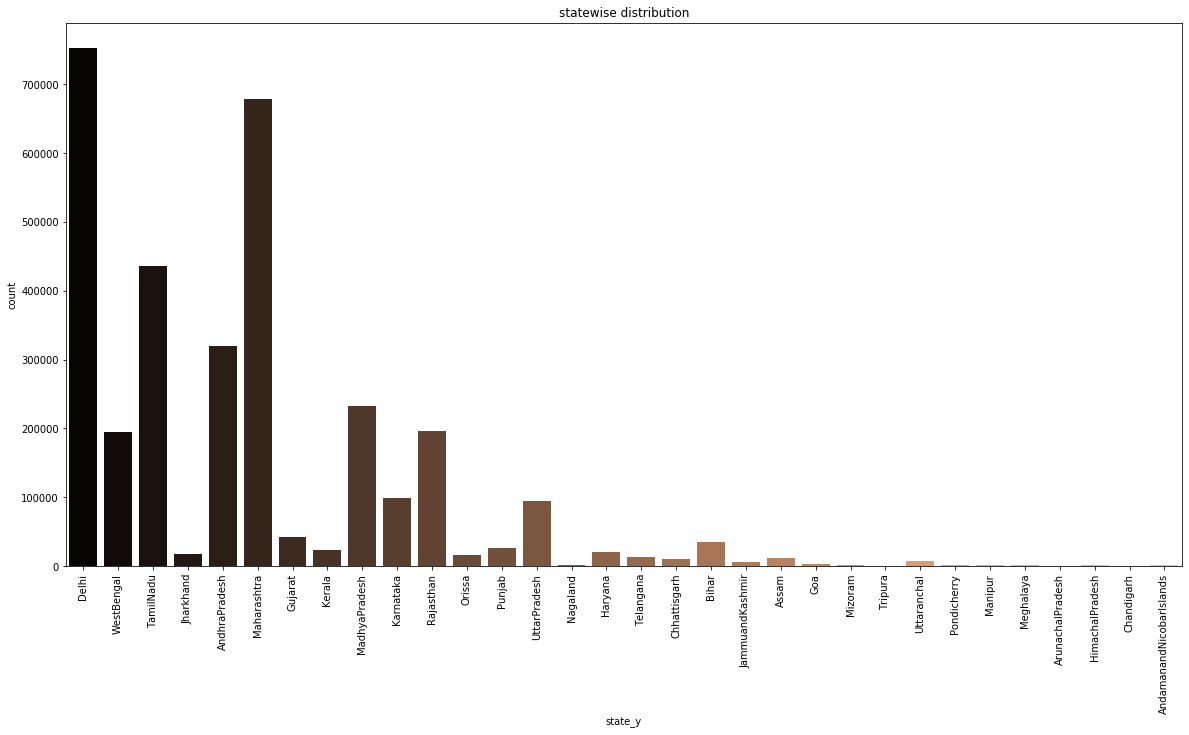

In [32]:
plt.figure(figsize=(20,10))

sns.countplot(x='state_y',data=events_s2,palette='copper').set_title('statewise distribution')
plt.xticks(rotation=90)
plt.show()

In [33]:

data1=pd.DataFrame(events_s2.groupby(['device_id'])['event_id'].count().sort_values(ascending=False)).reset_index()
data1['perc_dist']=(data1['event_id']/len(events_s2)*100)
data2=pd.DataFrame(events_s2.groupby(['city'])['event_id'].count().sort_values(ascending=False)).reset_index()
data2['perc_dist']=(data2['event_id']/len(events_s2)*100)
data3=pd.DataFrame(events_s2.groupby(['state_y'])['event_id'].count().sort_values(ascending=False)).reset_index()
data3['perc_dist']=(data3['event_id']/len(events_s2)*100)
data4=pd.DataFrame(events_s2.groupby(['longitude','latitude'])['event_id'].count().sort_values(ascending=False)).reset_index()
data4['perc_dist']=(data4['event_id']/len(events_s2)*100)


print('Device ID wise event distribution\n',data1)
print('\n\nCity wise event distribution\n',data2)
print('\n\nState wise event Distribution\n',data3)
print('\n\nlat long wise event Distribution\n',data4)

Device ID wise event distribution
                     device_id  event_id  perc_dist
0       5.536513450525271e+18     33426   1.027560
1      -4.792366453774469e+18     14568   0.447840
2       4.428420611296416e+17      6731   0.206920
3      -6.242501228649114e+18      4150   0.127577
4      -8.340098378141155e+18      3973   0.122135
...                       ...       ...        ...
60860  2.0194643832532183e+18         1   0.000031
60861  2.0192219790850237e+18         1   0.000031
60862  2.0138728867308024e+18         1   0.000031
60863  2.0108693046808696e+18         1   0.000031
60864      9409945007238010.0         1   0.000031

[60865 rows x 3 columns]


City wise event distribution
                            city  event_id  perc_dist
0                         Delhi    744276  22.880032
1                       Chennai    366875  11.278224
2                          Pune    317276   9.753485
3                        Mumbai    285246   8.768841
4                 Visakhapatna

### Observations:
- Delhi, Maharashtra, TamilNadu, AndhraPradesh are top 4 states that comprises of 62% of the events


#### - Device Id is the key between the datasets. It is present in all the datasets.
#### - Analysis of Device ID field - Count of device ids in all the dataset.
#### - Merging of Datasets
- The problem statement is to study the user demographic characteristics based on mobile usage, geolocation, mobile device properties so that targeted marketing can be achieved. So we should be considering gender_age_train data set as the primary data. So, we are merging other tables wrt this one.

In [34]:
## device_ids that are not in events data but are either present in user data or in device data
conn=mysql_conn()
device_id_users=pd.read_sql_query("select distinct device_id from gender_age_train",con=conn)
device_id_devices=pd.read_sql_query("select distinct device_id from phone_brand_device_model",con=conn)
conn.close()

events_data['device_id']=events_data['device_id'].astype('float64')
device_id_users['device_id']=device_id_users['device_id'].astype('float64')
device_id_devices['device_id']=device_id_devices['device_id'].astype('float64')




device_id_event=events_data['device_id'].unique()
user=set(device_id_users['device_id'])
devices=set(device_id_devices['device_id'])
event=set(device_id_event)

print("device_ids not present in event:",len(user.difference(event)))
print("device_ids not present in devices:",len(user.difference(devices)))
print("device_ids present in event and user as well:",len(user.intersection(event)))


device_ids not present in event: 13780
device_ids not present in devices: 28
device_ids present in event and user as well: 60865


In [35]:
events_s2['device_id']=events_s2['device_id'].astype('float64')
c['device_id']=c['device_id'].astype('float64')
mob_devices['device_id']=mob_devices['device_id'].astype('float64')

event=set(events_s2['device_id'])
user=set(c['device_id'])
devices=set(mob_devices['device_id'])

print("device_ids not present in event:",len(user.difference(event)))
print("device_ids not present in devices:",len(user.difference(devices)))
print("device_ids present in event and user as well:",len(user.intersection(event)))


device_ids not present in event: 13780
device_ids not present in devices: 28
device_ids present in event and user as well: 60865


#### Observations-II
- Based on comparison between tables:
    - With respect to Users table, 28 DeviceIds are not present in Devices data
    - With respect to Users table, 13780 DeviceIds are not present in Events data
    - 60865 DeviceIds from Events data is matching with the Users data

##### Merging the data
- user_gender as the base table, left join devices data
- left join to above the events data


In [36]:
merg1=pd.merge(c,mob_devices,how='left',on='device_id')
tot_data=pd.merge(merg1,events_s2, how='left',on='device_id')

In [37]:
print("missing values:\n",(tot_data.isnull().sum()), "\n\nMissing values in percentage:\n",(tot_data.isnull().sum()/len(tot_data)*100))

missing values:
 device_id           0
gender              0
age                 0
group               0
phone_brand        28
device_model       28
eng_brand          28
eng_model          28
event_id        13780
timestamp       13780
longitude       14203
latitude        14203
city            13780
state_y         13780
dtype: int64 

Missing values in percentage:
 device_id       0.000000
gender          0.000000
age             0.000000
group           0.000000
phone_brand     0.000857
device_model    0.000857
eng_brand       0.000857
eng_model       0.000857
event_id        0.421829
timestamp       0.421829
longitude       0.434777
latitude        0.434777
city            0.421829
state_y         0.421829
dtype: float64


In [38]:
tot_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3266730 entries, 0 to 3266729
Data columns (total 14 columns):
 #   Column        Dtype  
---  ------        -----  
 0   device_id     float64
 1   gender        object 
 2   age           int64  
 3   group         object 
 4   phone_brand   object 
 5   device_model  object 
 6   eng_brand     object 
 7   eng_model     object 
 8   event_id      float64
 9   timestamp     object 
 10  longitude     float64
 11  latitude      float64
 12  city          object 
 13  state_y       object 
dtypes: float64(4), int64(1), object(9)
memory usage: 373.8+ MB


In [39]:
merged_data=tot_data.drop(['gender','age','phone_brand','device_model'],axis=1)

In [40]:
merged_data.columns

Index(['device_id', 'group', 'eng_brand', 'eng_model', 'event_id', 'timestamp',
       'longitude', 'latitude', 'city', 'state_y'],
      dtype='object')

In [41]:

data1=pd.DataFrame(merged_data.groupby(['eng_brand','group'])['event_id'].count().sort_values(ascending=False)).reset_index()
data1['perc_dist']=(data1['event_id']/len(merged_data)*100)
data2=pd.DataFrame(merged_data.groupby(['state_y','eng_brand'])['event_id'].count().sort_values(ascending=False)).reset_index()
data2['perc_dist']=(data2['event_id']/len(merged_data)*100)
data3=pd.DataFrame(merged_data.groupby(['state_y','group'])['event_id'].count().sort_values(ascending=False)).reset_index()
data3['perc_dist']=(data3['event_id']/len(merged_data)*100)
data4=pd.DataFrame(merged_data.groupby(['group'])['event_id'].count().sort_values(ascending=False)).reset_index()
data4['perc_dist']=(data4['event_id']/len(merged_data)*100)
data5=pd.DataFrame(merged_data.groupby(['eng_brand'])['event_id'].count().sort_values(ascending=False)).reset_index()
data5['perc_dist']=(data4['event_id']/len(merged_data)*100)


print('Age_group-wise Mobile Brand Distribution\n',data1)
print('\n\nState-wise Mobile Brand Distribution\n',data2)
print('\n\nState-wise Group Distribution\n',data3)
print('\n\nGroup-wise count of Events\n',data4)
print('\n\nMobileBrand-wise count of Events\n',data5)


Age_group-wise Mobile Brand Distribution
              eng_brand   group  event_id  perc_dist
0               Xiaomi  M32-38    140805   4.310274
1               Xiaomi    M39+    114608   3.508340
2               Huawei  M32-38    101926   3.120123
3               Xiaomi  M23-26     98469   3.014299
4               Huawei    M39+     97068   2.971412
5              Samsung  M32-38     90519   2.770936
6               Xiaomi  M29-31     89923   2.752692
7              Samsung    M39+     85316   2.611664
8               Xiaomi    M22-     80251   2.456616
9              Samsung  M23-26     76723   2.348618
10             Samsung  M29-31     65870   2.016389
11              Huawei  M29-31     64173   1.964442
12              Huawei  M23-26     64001   1.959176
13              Xiaomi  F33-42     58350   1.786190
14              Xiaomi  M27-28     56117   1.717834
15             Samsung  M27-28     50560   1.547725
16              Huawei    M22-     48451   1.483165
17             Samsung

No handles with labels found to put in legend.
No handles with labels found to put in legend.


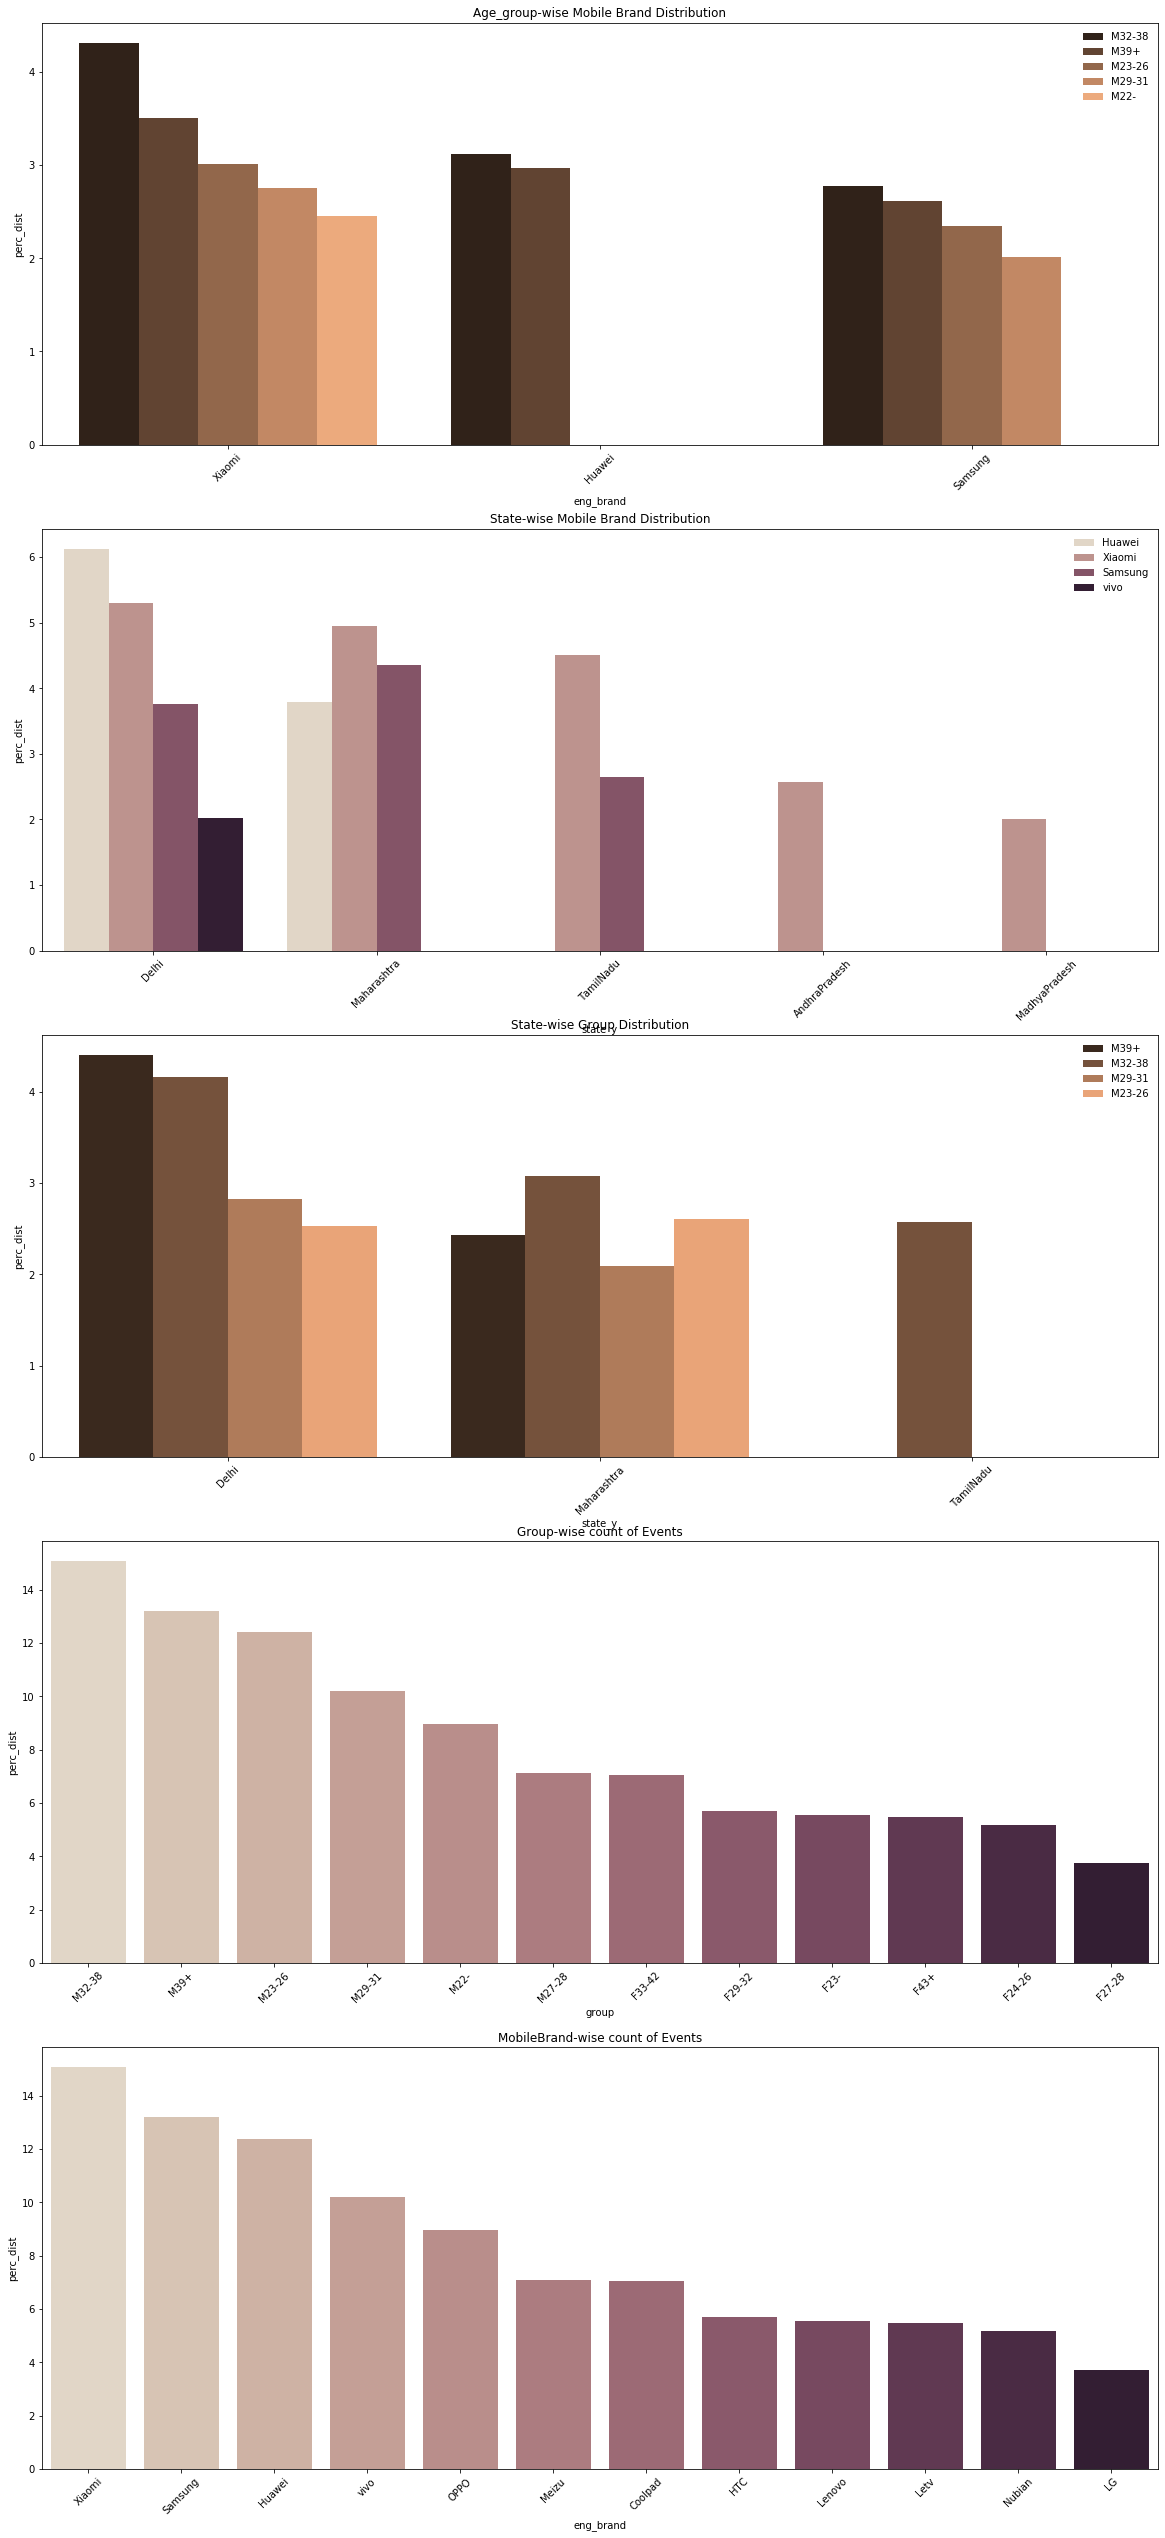

In [42]:
data1g=data1[data1['perc_dist']>2]
data2g=data2[data2['perc_dist']>2]
data3g=data3[data3['perc_dist']>2]
data4g=data4[data4['perc_dist']>2]
data5g=data5[data5['perc_dist']>2]


##Plots
##Group wise mobile brand
fig,ax=plt.subplots(5,1,figsize=(20,45))

sns.barplot(x='eng_brand',y='perc_dist',hue='group',data=data1g,palette='copper',ax=ax[0]).set_title('Age_group-wise Mobile Brand Distribution')
sns.barplot(x='state_y',y='perc_dist',hue='eng_brand',data=data2g,palette='ch:.25',ax=ax[1]).set_title('State-wise Mobile Brand Distribution')
sns.barplot(x='state_y',y='perc_dist',hue='group',data=data3g, palette='copper',ax=ax[2]).set_title('State-wise Group Distribution')
sns.barplot(x='group',y='perc_dist',data=data4g,palette='ch:.25',ax=ax[3]).set_title('Group-wise count of Events')
sns.barplot(x='eng_brand',y='perc_dist',data=data5g,palette='ch:.25',ax=ax[4]).set_title('MobileBrand-wise count of Events')


for i in range(5):
    ax[i].legend(loc='upper right', frameon=False)
    for tick in ax[i].get_xticklabels():
        tick.set_rotation(45)

plt.show()


### Observations post merging:
- Xiaomi users in age group M32-38, M39+, M23-26, M29-31, M22- have high events logged.
- Huawei users in age group M32-38, M39+ have high events logged
- Samsung users in agegroup M32-38, M39+, M23-26, M29-31 have high events logged
- Huawei, Xiaomi, Samsung and Vivo Mobile brand users from Delhi have logged higher number of events
- Huawei, Xiaomi, Samsung Mobile brand users from Maharashtra have logged higher number of events
- Xiaomi, Samsung Mobile brand users from TamilNadu have logged higher number of events
- Xiaomi Mobile brand users from AndhraPradesh, MadhyaPradesh have logged higher number of events
- Users from Delhi and Maharashtra in age group M32-38, M39+, M23-26, M29-31 have logged higher number of events
- Users from TamilNadu in age group M32-38 has logged higher number of events.
- Top 3 groups with high events logs are M32-38, M39+, M23-26
- Top mobile brands to log higher events are Xiaomi, Samsung,Huawei, Vivo, Oppo etc.


## Final Observation:
    - Huawei, Xiaomi, Samsung mobile brand users from Delhi, Maharashtra, TamilNadu in age group M32-38, M39+, M23-26 have logged in high events.